# Problema de las $N$ reinas.
### Autor: Saúl Sosa Díaz



---
## El Problema.
El rompecabezas de las $N$ reinas es el problema de colocar $N$ reinas de ajedrez en un tablero de ajedrez de $N$×$N$ de manera que ninguna reina amenace a otra. Por lo tanto, una solución requiere que ninguna reina comparta la misma fila, columna o diagonal. Existen soluciones para todos los números naturales $\N$ con la excepción de $n = 2$ y $n = 3$ \  $n \in \N$. 
Aunque el número exacto de soluciones sólo se conoce para $n ≤ 27$, la tasa de crecimiento asintótico del número de soluciones es aproximadamente $(0.143 n)n$.
  
El problema original se planteó para un tablero de ajedrez convencional de $8$x$8$. Existen 92 soluciones posibles para esta variante, teniendo en cuenta las rotaciones. Sin considerar dichas rotaciones, hay 12 soluciones únicas. Esta cuestión fue propuesta por primera vez a mediados del siglo XIX. En tiempos contemporáneos, frecuentemente se presenta como un ejemplo para ilustrar diversas técnicas de programación.

En este cuaderno, buscaremos resolverlo mediante varios enfoques, uno de los cuales incluye la formulación de un modelo matemático que se entregará a un software de resolución, como podría ser GLPK.


### Resolvemos el modelo.

#### Definimos el modelo.

In [2]:
using JuMP, GLPK

function solve_nqueens(n)
    model = Model(GLPK.Optimizer)
    
    # Variables de decisión
    @variable(model, x[1:n, 1:n], Bin)
    
    # Restricciones de fila y columna
    for i in 1:n
        @constraint(model, sum(x[i, j] for j in 1:n) == 1)  # Una reina por fila
        @constraint(model, sum(x[j, i] for j in 1:n) == 1)  # Una reina por columna
    end
    
    # Restricciones de diagonales
    for i in 1:n
        for j in 1:n
            # Diagonal principal superior derecha
            @constraint(model, sum(x[k, l] for k in 1:n, l in 1:n if k-l == i-j) <= 1) # k - l = i - j significa que están en la misma diagonal derecha por ejemplo (1,1)  1 - 1 = 0 y 2 - 2 = 0 
            # Diagonal principal inferior izquierda
            @constraint(model, sum(x[k, l] for k in 1:n, l in 1:n if k+l == i+j) <= 1)
        end
    end
    
    # Resuelve el modelo
    optimize!(model)
    
    return value.(x), solve_time(model)
end

solve_nqueens (generic function with 1 method)

#### Mostramos el resultado.

In [3]:
using Plots

function plot_nqueens(solution)
    n = size(solution, 1)
    p = plot(; 
            legend=false, 
            ratio=1, 
            xlims=(0, n), 
            ylims=(0, n), 
            xticks=1:n, 
            yticks=1:n, 
            border=:none,   
            background_color_inside=:lightgray, 
            background_color_outside=:transparent, 
            grid=false
            )
    
    # Draw the board
    for i in 1:n
        for j in 1:n
            if (i + j) % 2 == 0
                plot!([j-1, j, j, j-1, j-1], [n-i, n-i, n-i+1, n-i+1, n-i], fill=(0, :lightgray), linealpha=0)
            else
                plot!([j-1, j, j, j-1, j-1], [n-i, n-i, n-i+1, n-i+1, n-i], fill=(0, :darkgray), linealpha=0)
            end
        end
    end

    pastel_blue = RGB(0.6, 0.8, 0.9)
    marker_diameter = 1.0/n * 100  # This adjusts the size of the marker based on the number of squares.
    # Place the queens
    for i in 1:n
        for j in 1:n
            if solution[i, j] == 1
                scatter!([j-0.5], [n-i+0.5], markercolor=pastel_blue, markershape=:circle, markerstrokewidth=1, markersize=marker_diameter, label=false)
            end
        end
    end
    
    return p
end

plot_nqueens (generic function with 1 method)

Solution for 4 queens: 


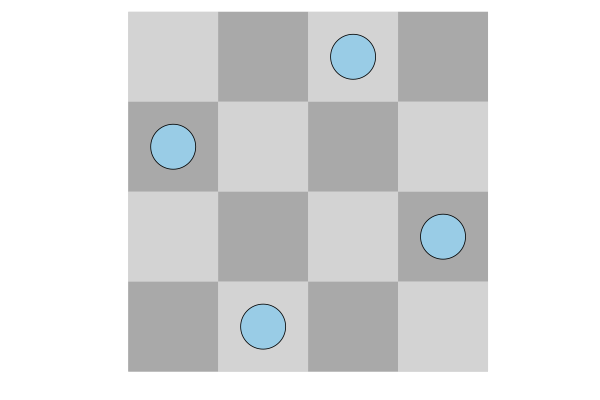

Solution for 5 queens: 


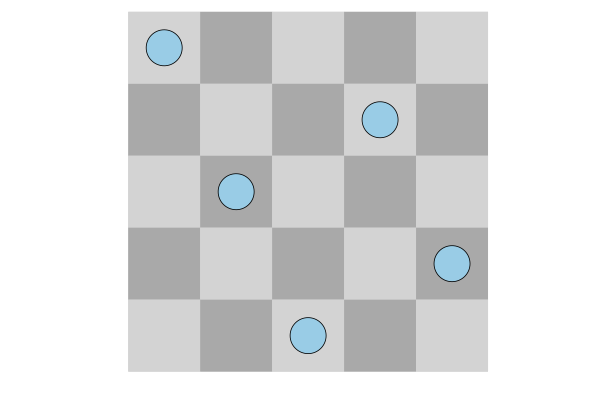

Solution for 6 queens: 


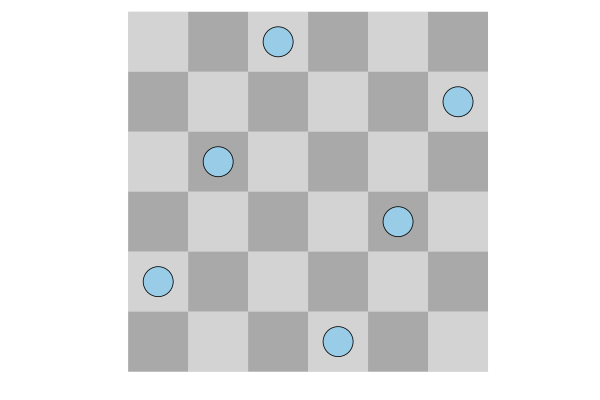

Solution for 7 queens: 


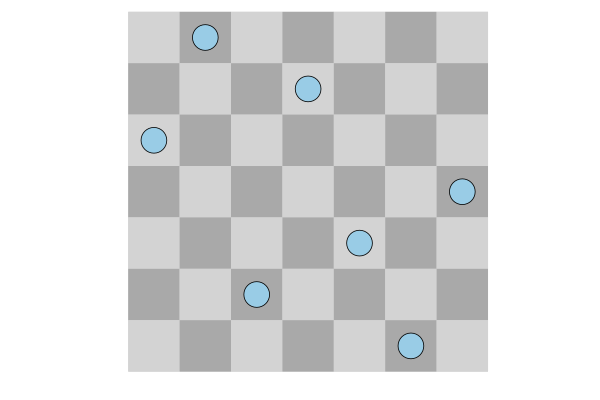

Solution for 8 queens: 


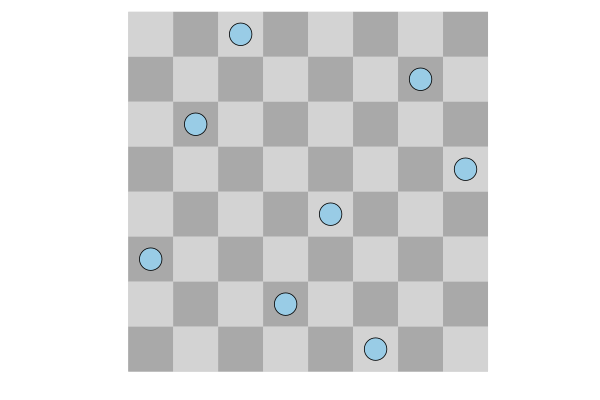

Solution for 9 queens: 


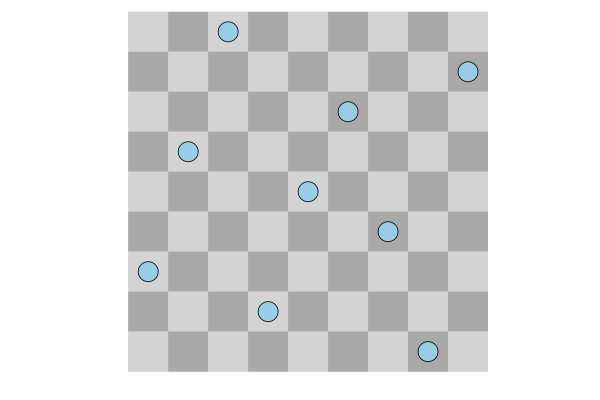

Solution for 10 queens: 


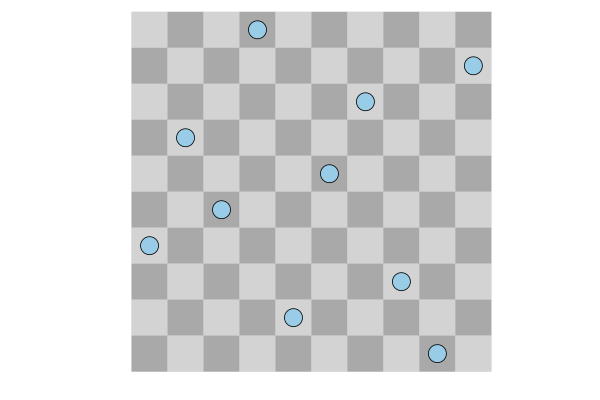

In [4]:
for n in 4:10
    result, time = solve_nqueens(n)
    println("Solution for $n queens: ")
    display(plot_nqueens(result))
end


Claro, estas restricciones son esenciales para asegurar que no haya más de una reina en cualquier diagonal, lo que es un requerimiento clave del problema de las \( n \)-reinas.

1. **Restricción de Diagonal Descendente**:

   Cada diagonal descendente en un tablero de ajedrez puede ser identificada de manera única por la suma de sus coordenadas de fila y columna. Por ejemplo, en un tablero de 8x8, la diagonal principal que va desde la esquina superior izquierda (1,1) hasta la esquina inferior derecha (8,8) tiene una suma constante de 2, 3,..., 16 (para un total de 15 diagonales posibles).

   La línea:
   ```julia
   for d in 2:2n
   ```
   itera sobre cada posible valor de esta suma (para un tablero \( n \times n \), los valores posibles varían desde 2 hasta \( 2n \)).

   La restricción:
   ```julia
   @constraint(modelo, sum(x[i, j] for i in 1:n for j in 1:n if i + j == d) <= 1)
   ```
   asegura que, para cada diagonal descendente identificada por la suma \( i + j \), la cantidad total de reinas en esa diagonal no exceda 1.

2. **Restricción de Diagonal Ascendente**:

   De manera similar, cada diagonal ascendente en un tablero de ajedrez puede ser identificada de manera única por la diferencia de sus coordenadas de fila y columna. En un tablero de 8x8, la diagonal que va desde la esquina inferior izquierda (8,1) hasta la esquina superior derecha (1,8) tiene una diferencia constante que varía desde -7 hasta 7.

   La línea:
   ```julia
   for d in 1-n:n-1
   ```
   itera sobre cada posible valor de esta diferencia (para un tablero \( n \times n \), los valores posibles varían desde \( 1-n \) hasta \( n-1 \)).

   La restricción:
   ```julia
   @constraint(modelo, sum(x[i, j] for i in 1:n for j in 1:n if i - j == d) <= 1)
   ```
   asegura que, para cada diagonal ascendente identificada por la diferencia \( i - j \), la cantidad total de reinas en esa diagonal no exceda 1.

En resumen, estas restricciones se aseguran de que las diagonales (tanto descendentes como ascendentes) del tablero no tengan más de una reina.

In [5]:
function n_reinas(n)
    # Crear el modelo usando GLPK como solver
    modelo = Model(GLPK.Optimizer)
    
    # Variables binarias: x[i,j] = 1 si hay reina en la fila i, columna j. 0 en caso contrario
    @variable(modelo, x[1:n, 1:n], Bin)

    # Restricción: Solo una reina por fila
    for i in 1:n
        @constraint(modelo, sum(x[i, j] for j in 1:n) == 1)
    end

    # Restricción: Solo una reina por columna
    for j in 1:n
        @constraint(modelo, sum(x[i, j] for i in 1:n) == 1)
    end

    # Restricción: Solo una reina por diagonal descendente
    for d in 2:2n
        @constraint(modelo, sum(x[i, j] for i in 1:n for j in 1:n if i + j == d) <= 1)
    end

    # Restricción: Solo una reina por diagonal ascendente
    for d in 1-n:n-1
        @constraint(modelo, sum(x[i, j] for i in 1:n for j in 1:n if i - j == d) <= 1)
    end

    # Resolver el modelo
    optimize!(modelo)
    return value.(x), solve_time(modelo)
end

n_reinas (generic function with 1 method)

In [14]:
times = []
max_n = 40
for n in 5:5:max_n # Generates an array of 5 to 40 in 5 by 5
    firstModel, timeFirstModel = solve_nqueens(n)
    resultSecondModel, timeSecondModel = n_reinas(n)
    push!(times, [timeFirstModel, timeSecondModel])
end

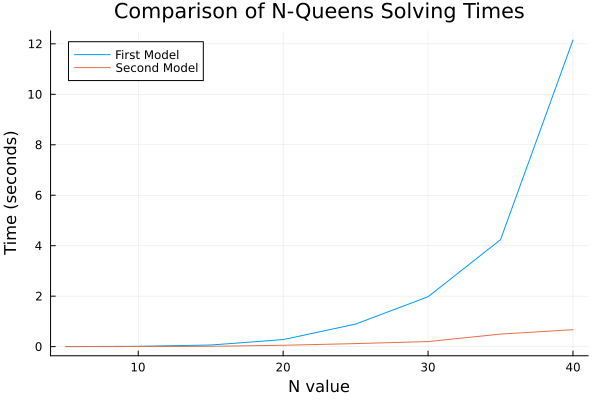

In [17]:
n_values = 5:5:max_n

# Descomponer "times" en dos listas para cada modelo
timesFirstModel = [t[1] for t in times]
timesSecondModel = [t[2] for t in times]

# Crear el plot
plt = plot(n_values, timesFirstModel, label="First Model", line=:solid, xlabel="N value", ylabel="Time (seconds)", title="Comparison of N-Queens Solving Times")
plot!(n_values, timesSecondModel, label="Second Model", line=:solid)

# Mostrar el plot
display(plt)

### Resolución del problema.
Importamos los paquetes necesarios.

#### Introducimos los datos.

#### Resolvemos el modelo.

#### Mostramos la solución óptima.